# For capturing EDA functions

# Import Required Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

# Define Functions

In [2]:
###write all functions here

#to combine two dataframe along rows
def concatenate_two_dfs(df1,df2):
    return pd.concat([df1, df2], ignore_index=True)

#to split input and output variables
def split_input_output(df,output_cols):
    input_df = df.drop(output_cols, axis=1)
    output_df = df[output_cols]
    return [input_df,output_df]

#to get list of numeric and categorical columns from dataset
def get_num_cat_columns(df):
    num_columns = df.select_dtypes(include=np.number).columns.tolist()
    cat_columns = df.select_dtypes(include=['object']).columns.tolist()
    return [num_columns, cat_columns]

def get_column_names_with_unique_value_in_range(df,r_min,r_max):
    cols = [column for column in df.columns if ((df[column].nunique() >= r_min) and (df[column].nunique() <=r_max) )]
    return cols

# Calculate descriptive statistics for the DataFrame for numeric columns, transpose the result, and apply styling
# how to use describe_dataframe_with_nice_table(dataframe)
def describe_dataframe_numcols_with_nice_table(df):
    return df.describe()  
    #return df.describe().T\
        #.style.bar(subset=['mean'], color=px.colors.qualitative.G10[2])\
        #.background_gradient(subset=['std'], cmap='Blues')\
        #.background_gradient(subset=['50%'], cmap='BuGn')
    
# Create summary of unique values, missing values in nice table
# how to use summarize_dataframe_missing_unique_values(dataframe)
def summarize_dataframe_missing_unique_values(df):
    # Create a new DataFrame 'sum' to store summary information
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])  # Column 'dtypes' stores data types of columns
    sum['missing#'] = df.isna().sum()  # Column 'missing#' stores the count of missing values for each column
    sum['missing%'] = (df.isna().sum()) / len(df)  # Column 'missing%' stores the percentage of missing values
    sum['uniques'] = df.nunique().values  # Column 'uniques' stores the count of unique values for each column
    sum['count'] = df.count().values  # Column 'count' stores the count of non-missing values for each column
    # Note: The 'skew' column is commented out and not used in this version of the function

    #uncomment below line if you just need the dataframe
    #return sum  # Return the 'sum' DataFrame containing the summary information

    # apply a background gradient using the 'Blues' colormap
    #return sum.style.background_gradient(cmap='Blues')
    return sum



# Create countplots for categorical variables
# note target is the column wrt which plots needs to be creaetd
#how to use create_count_plots_for_categorical_variables(data_horse_survival,3,"age",10)
def create_count_plots_for_categorical_variables(df,n_cols_plots,target,nunique_limit):
    columns_cat = [column for column in df.columns if df[column].nunique() <= nunique_limit]
    #columns_cat = [column for column in df.columns]
    
    n_rows = (len(columns_cat) - 1) // n_cols_plots + 1
    fig, ax = plt.subplots(n_rows, n_cols_plots, figsize=(17, 4 * n_rows))
    ax = ax.flatten()
    
    for i, column in enumerate(columns_cat):
        sns.countplot(data=df, x=column, ax=ax[i],hue=target)

        # Titles
        ax[i].set_title(f'{column} Counts', fontsize=18)
        ax[i].set_xlabel(None, fontsize=16)
        ax[i].set_ylabel(None, fontsize=16)
        ax[i].tick_params(axis='x', rotation=10)

        for p in ax[i].patches:
            value = int(p.get_height())
            ax[i].annotate(f'{value:.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                           ha='center', va='bottom', fontsize=9)

    ylim_top = ax[i].get_ylim()[1]
    ax[i].set_ylim(top=ylim_top * 1.1)
    for i in range(len(columns_cat), len(ax)):
        ax[i].axis('off')

    # fig.suptitle(plotname, fontsize=25, fontweight='bold')
    plt.tight_layout()
    return plt.show()
    
    
# Get scatter matrix for numeric variables
# hot to use create_scatter_matrix_for_numeric_variables(data_horse_survival,"age")
def create_scatter_matrix_for_numeric_variables(df,target):
    plotname = 'Scatter Matrix with Target'
    
    num_var = df.select_dtypes(include=np.number).columns.tolist()
    
    g = sns.pairplot(data=df, x_vars=num_var, y_vars=num_var, hue=target, corner=True)
    g._legend.set_bbox_to_anchor((0.8, 0.7))
    g._legend.set_title(target)
    g._legend.loc = 'upper center'
    g._legend.get_title().set_fontsize(14)
    for item in g._legend.get_texts():
        item.set_fontsize(14)

    plt.suptitle(plotname, ha='center', fontweight='bold', fontsize=25, y=0.98)
    plt.tight_layout()
    return plt.show()


## plot distribution of numeric variables from train and test data on top of each other
# how to use compare_numeric_variables_from_train_test_dataframe(train_df,test_df)
def compare_numeric_variables_from_train_test_dataframe(train,test):
    num_var = train.select_dtypes(include=np.number).columns.tolist()
    
    df = pd.concat([train[num_var].assign(Source = 'Train'), 
                    test[num_var].assign(Source = 'Test')], 
                   axis=0, ignore_index = True);

    fig, axes = plt.subplots(len(num_var), 3 ,figsize = (16, len(num_var) * 4.2), 
                             gridspec_kw = {'hspace': 0.35, 'wspace': 0.3, 'width_ratios': [0.80, 0.20, 0.20]});

    for i,col in enumerate(num_var):
        ax = axes[i,0];
        sns.kdeplot(data = df[[col, 'Source']], x = col, hue = 'Source', ax = ax, linewidth = 2.1)
        ax.set_title(f"\n{col}",fontsize = 9, fontweight= 'bold');
        ax.grid(visible=True, which = 'both', linestyle = '--', color='lightgrey', linewidth = 0.75);
        ax.set(xlabel = '', ylabel = '');
        ax = axes[i,1];
        sns.boxplot(data = df.loc[df.Source == 'Train', [col]], y = col, width = 0.25,saturation = 0.90, linewidth = 0.90, fliersize= 2.25, color = '#037d97',
                    ax = ax);
        ax.set(xlabel = '', ylabel = '');
        ax.set_title(f"Train",fontsize = 9, fontweight= 'bold');

        ax = axes[i,2];
        sns.boxplot(data = df.loc[df.Source == 'Test', [col]], y = col, width = 0.25, fliersize= 2.25,
                    saturation = 0.6, linewidth = 0.90, color = '#E4591E',
                    ax = ax); 
        ax.set(xlabel = '', ylabel = '');
        ax.set_title(f"Test",fontsize = 9, fontweight= 'bold');

    plt.tight_layout();
    return plt.show();


## distribution of numerical features with target in dataframe
# how to use

def get_distribution_of_numerical_features_with_target(df,target):

    num_var = df.select_dtypes(include=np.number).columns.tolist()
    
    plt.figure(figsize=(14, len(num_var) * 2.5))

    for idx, column in enumerate(num_var):
        plt.subplot(len(num_var), 2, idx*2+1)
        sns.histplot(x=column, hue=target, data=df, bins=30, kde=True)
        plt.title(f"{column} Distribution for outcome")
        plt.ylim(0, df[column].value_counts().max() + 10)

    plt.tight_layout()
    return plt.show()


# Get correlation matrix of numeric variables
# how to use show_correlation_matrix(data_horse_survival)
def show_correlation_matrix(df):
    
    num_var = df.select_dtypes(include=np.number).columns.tolist()
    
    corr_matrix = df[num_var].corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    plt.figure(figsize=(15, 12))
    sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='Blues', fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9} )
    plt.title('Correlation Matrix', fontsize=15)
    return plt.show()


In [3]:
#import dataset here
data_horse_survival = pd.read_csv("/kaggle/input/horse-survival-dataset/horse.csv")

# Call each function to visualize the output

Concatenating two dataframes

 
 
 
 

Splitting dataframe to input and target dataframe based on column value, multiple target columns can be specified as list
(299, 27)
(299,)

 
 
 
 

Get numeric and categorical columns
numeric columns : ['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3']
categorical columns : ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome', 'surgical_lesion', 'cp_data']

 
 
 
 

Get column names with number of unique values in specied range both inclusive
colunmns are ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastr

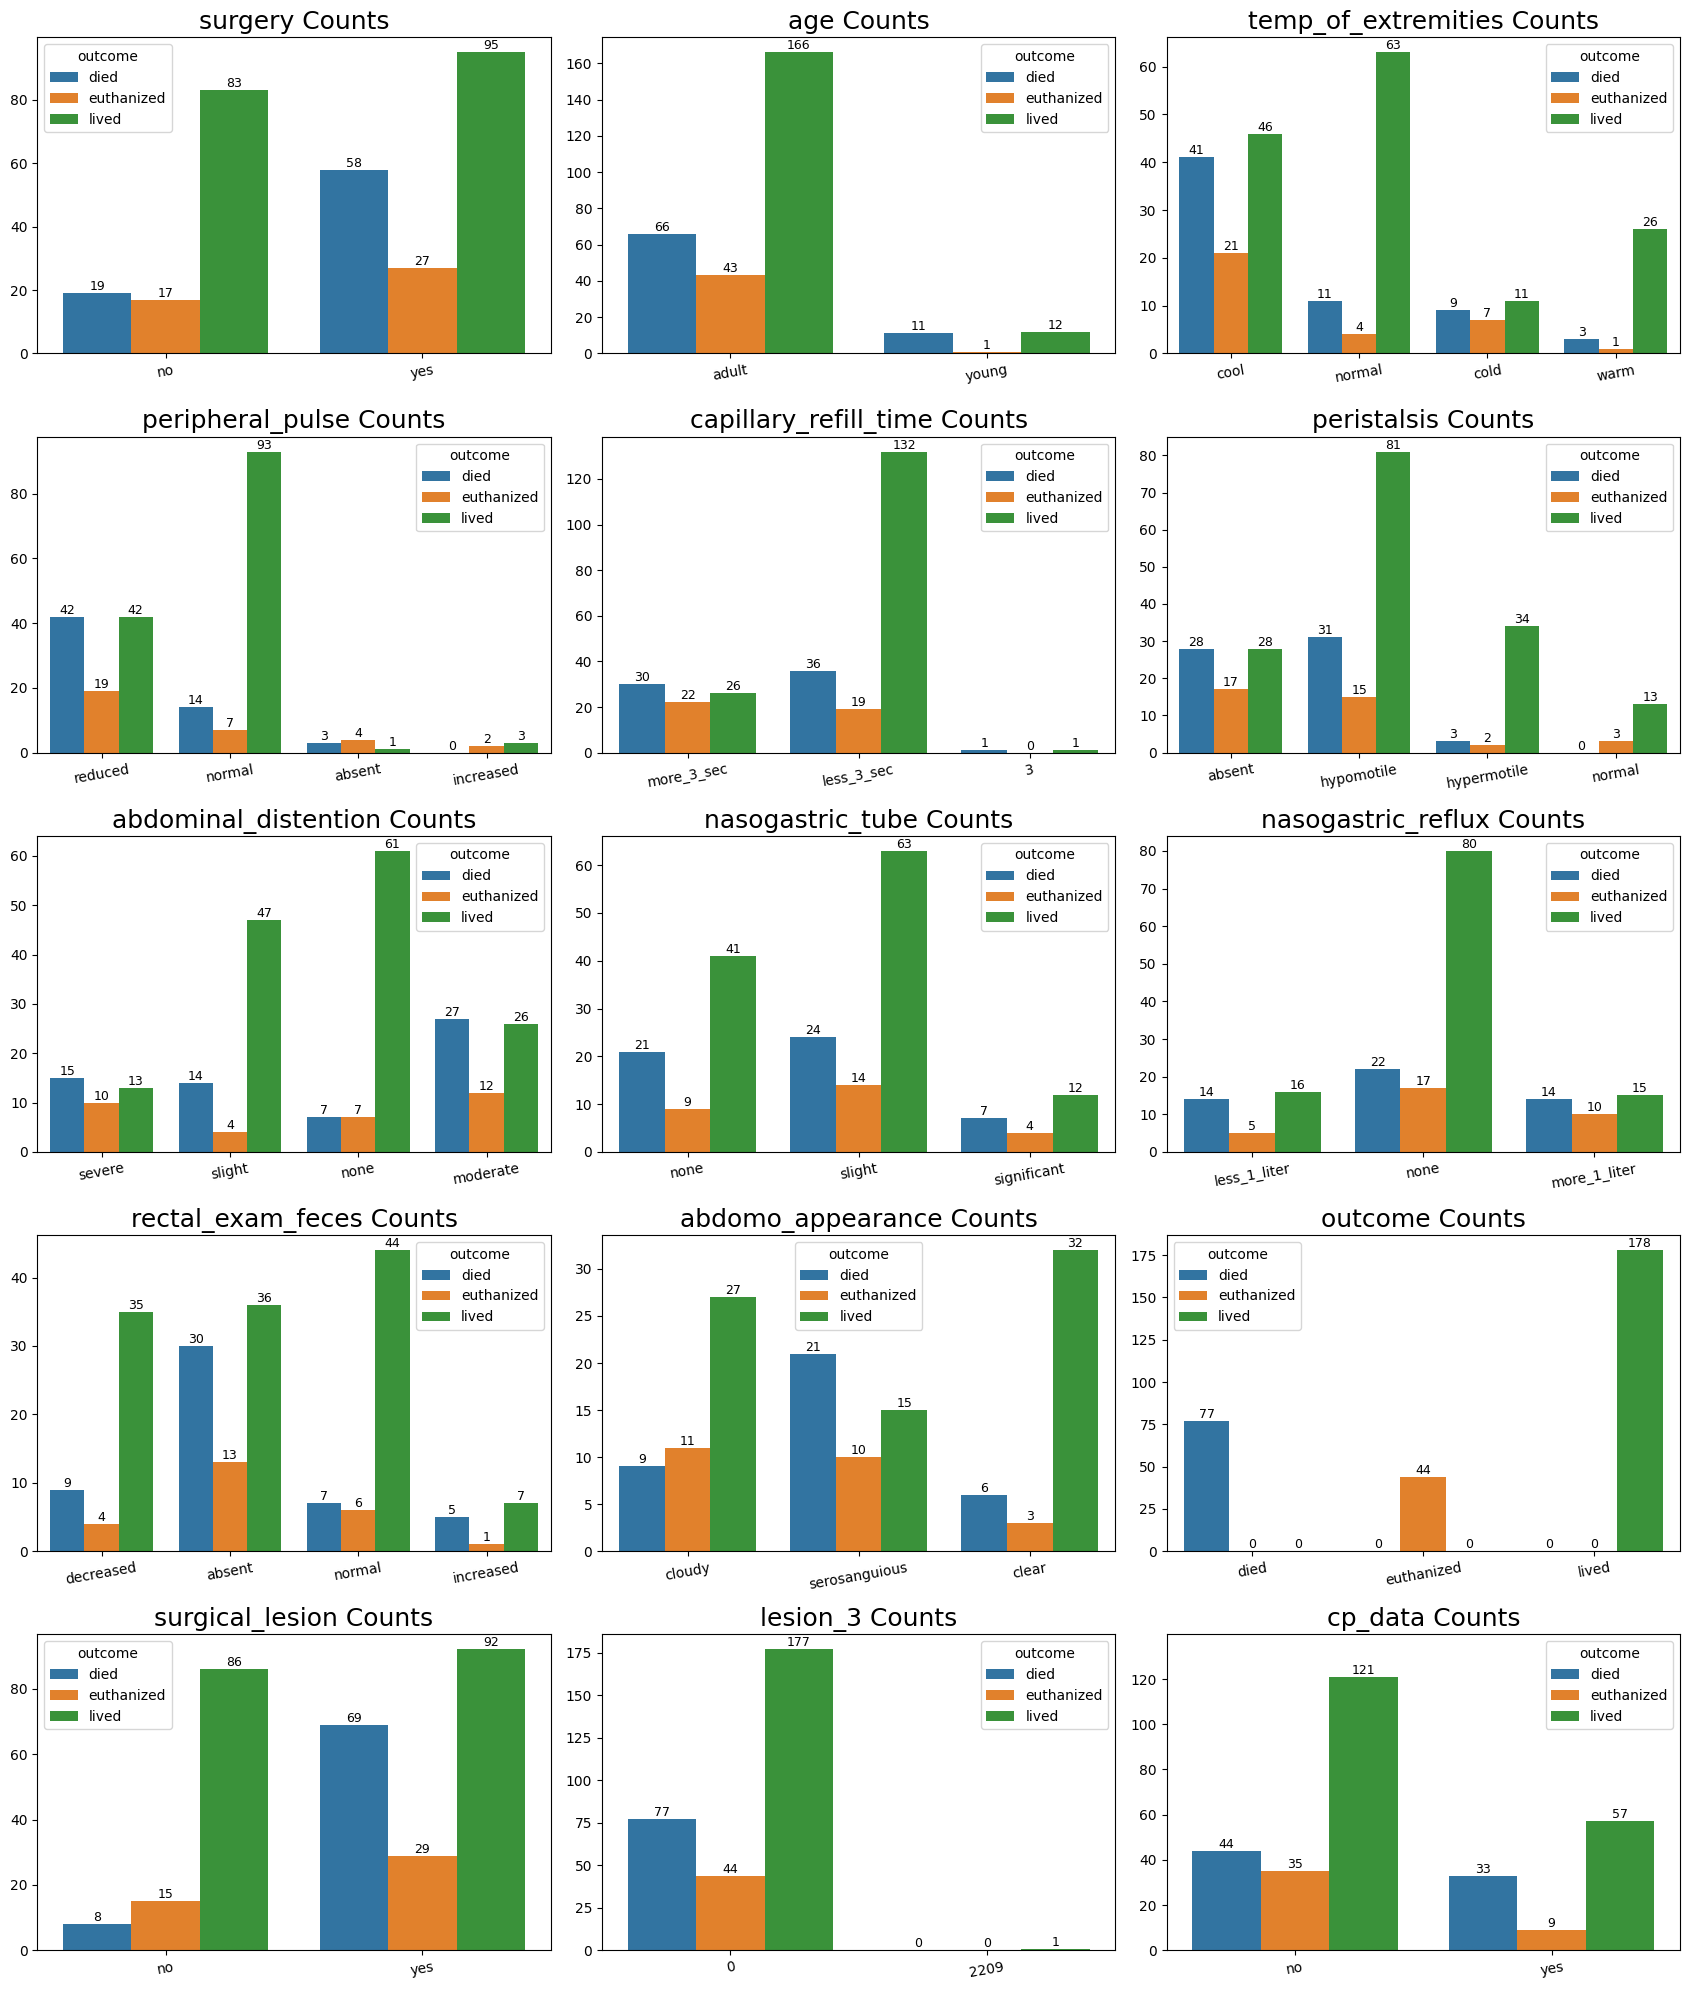


 
 
 
 

Create scatter matrix for numeric variables, provide targe column


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_20/3778242084.py:103: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


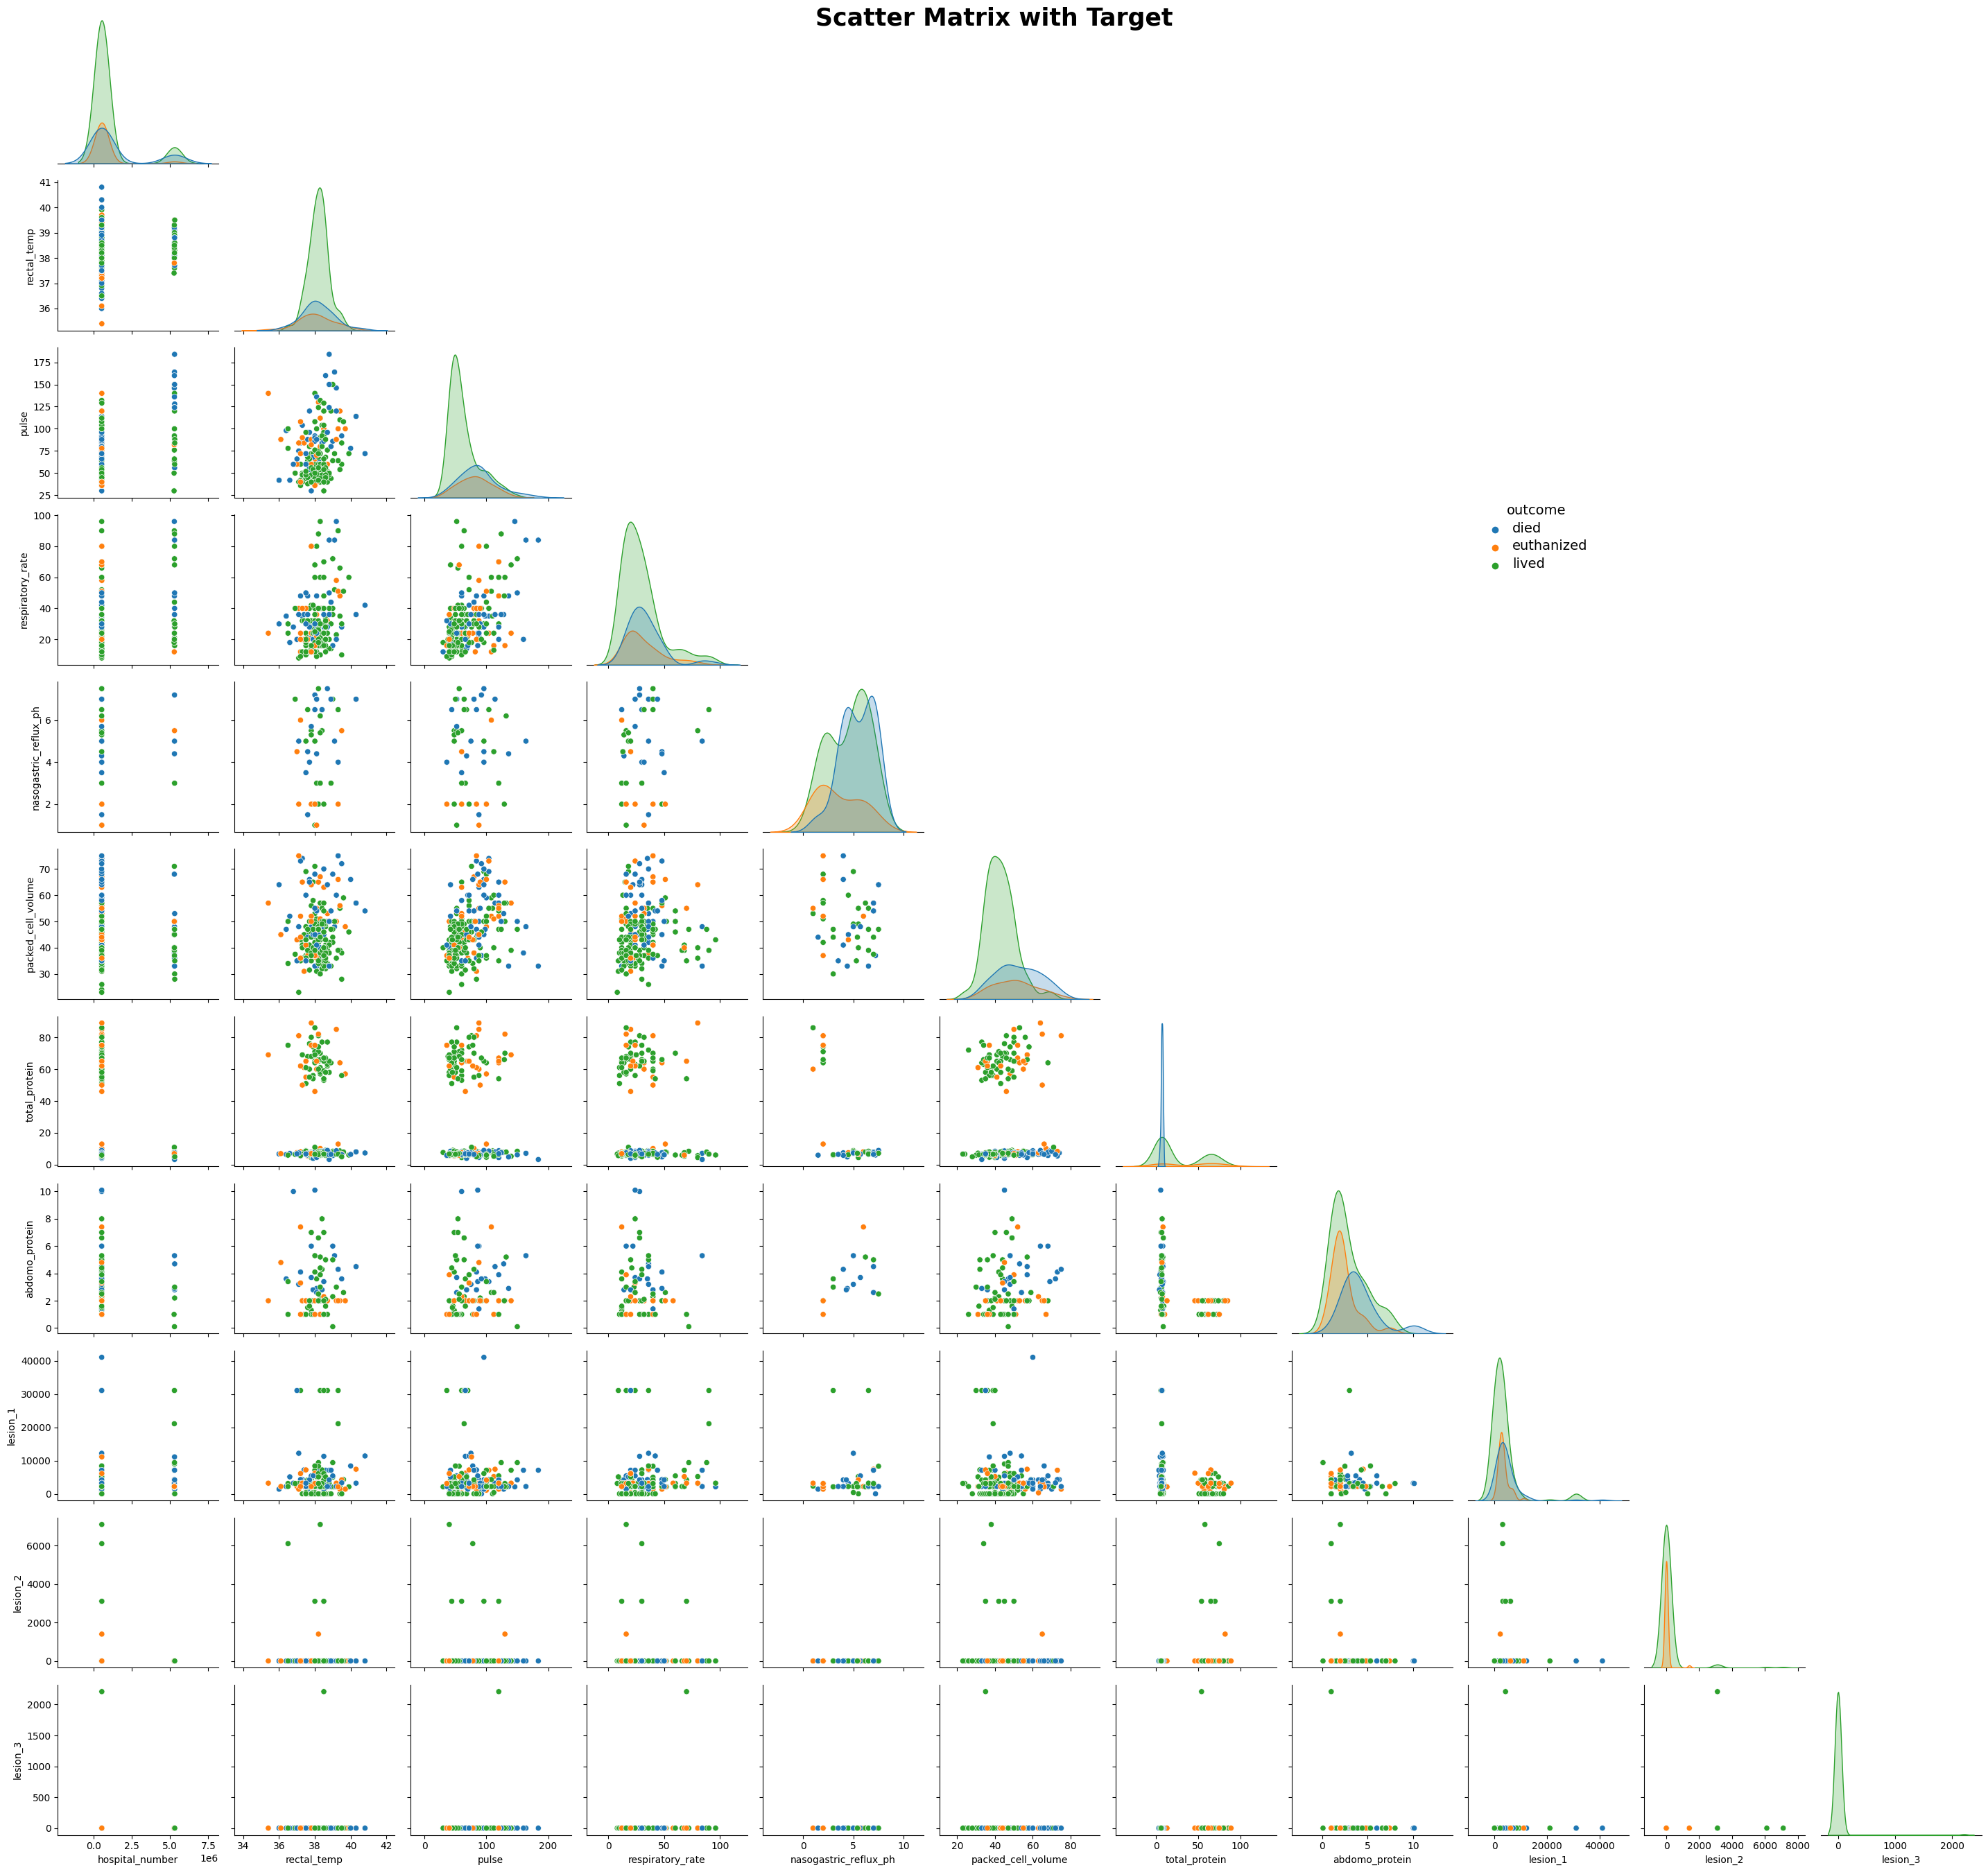


 
 
 
 

Running compare_numeric_variables_from_train_test_dataframe


/tmp/ipykernel_20/3778242084.py:121: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df[[col, 'Source']], x = col, hue = 'Source', ax = ax, linewidth = 2.1)
/tmp/ipykernel_20/3778242084.py:121: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df[[col, 'Source']], x = col, hue = 'Source', ax = ax, linewidth = 2.1)
/tmp/ipykernel_20/3778242084.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout();


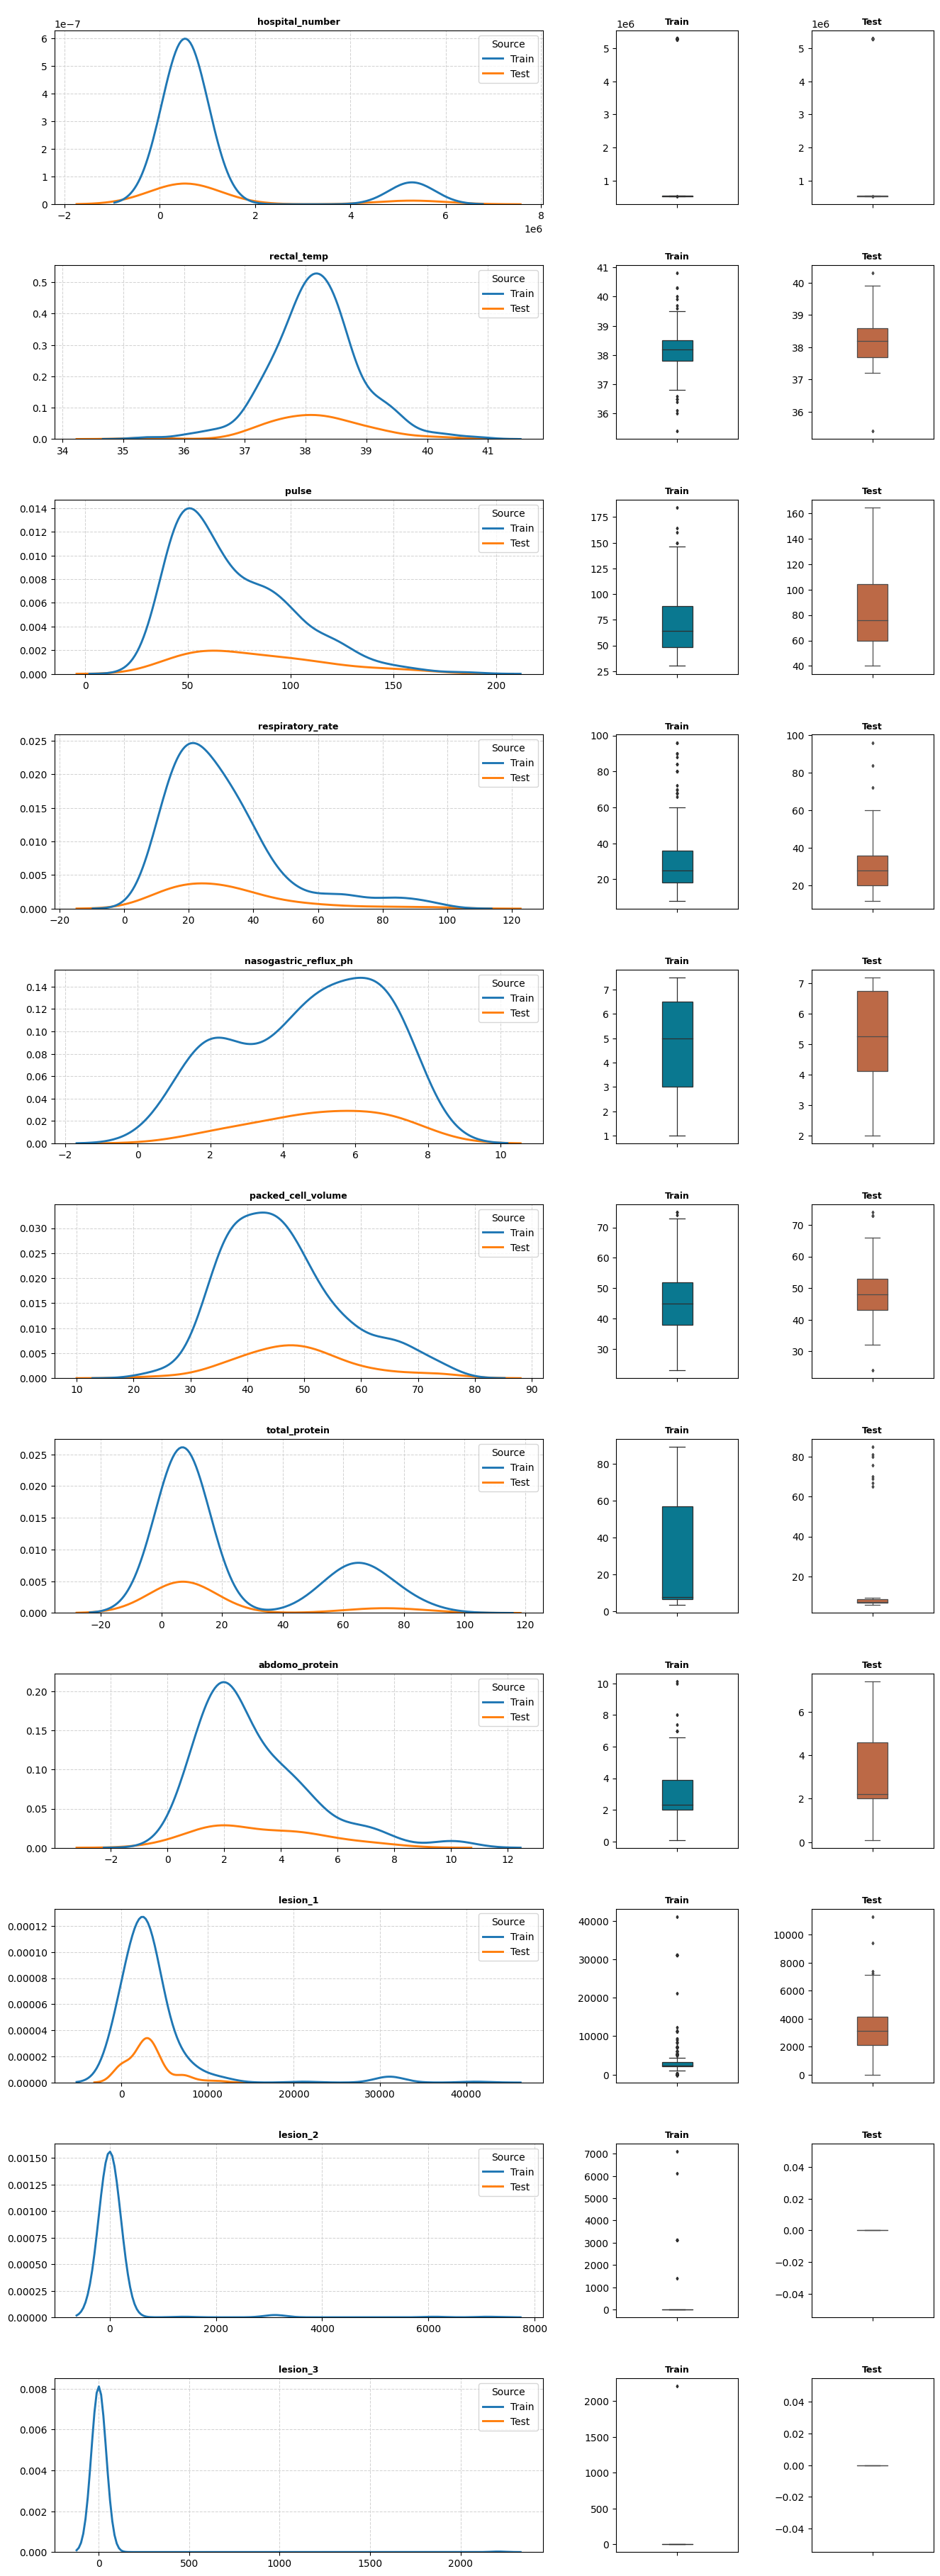


 
 
 
 

Running get_distribution_of_numerical_features_with_target


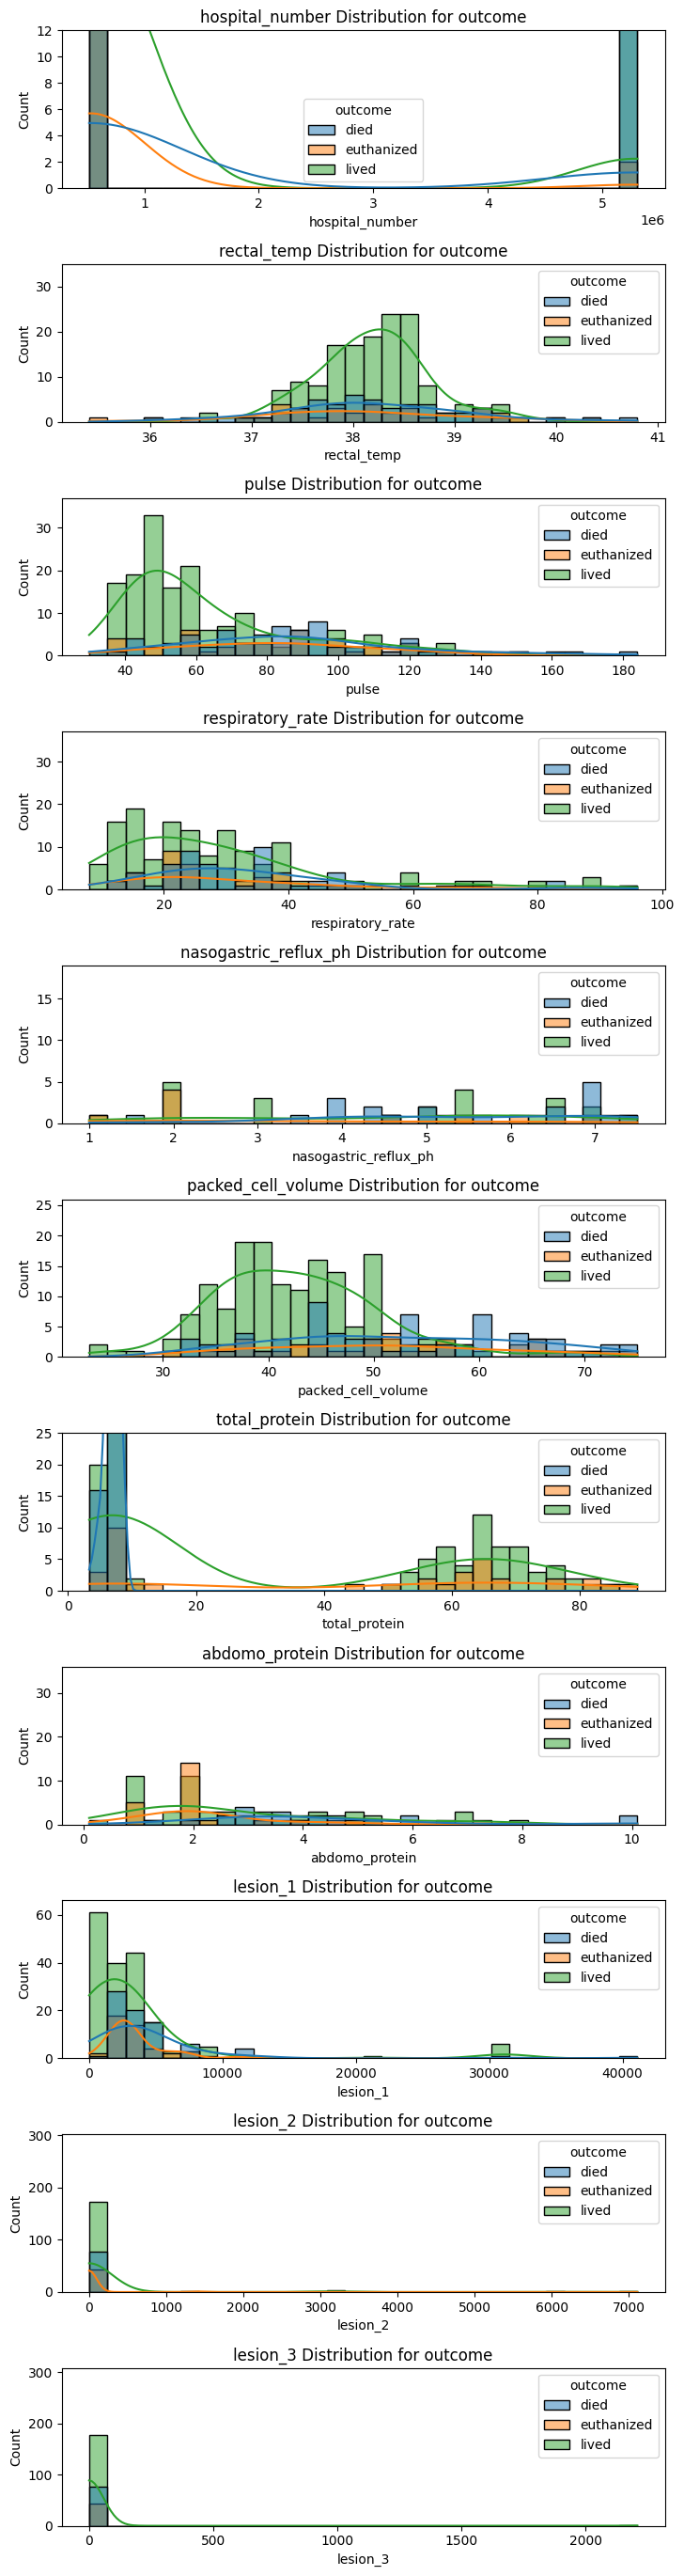


 
 
 
 

Show correlation matrix of numeric variables


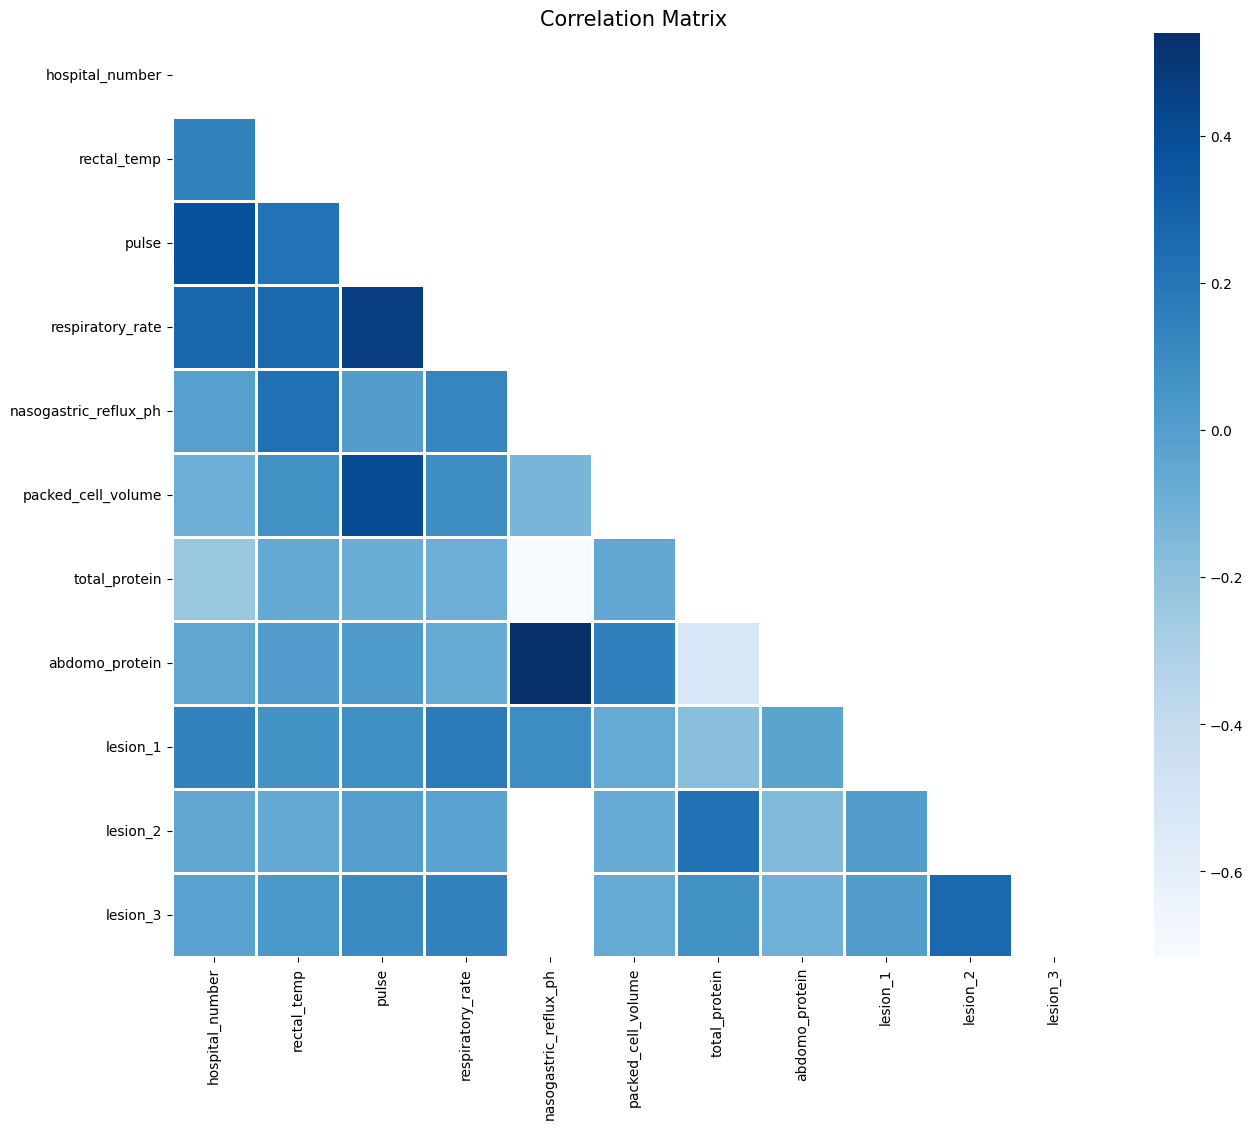

In [4]:
print("Concatenating two dataframes")
combined_df = concatenate_two_dfs(data_horse_survival,data_horse_survival)
print("\n \n \n \n \n")

print("Splitting dataframe to input and target dataframe based on column value, multiple target columns can be specified as list")
[input_df,target_df] = split_input_output(data_horse_survival,"outcome")
print(input_df.shape)
print(target_df.shape)
print("\n \n \n \n \n")


print("Get numeric and categorical columns")
[num_cols, cat_cols] = get_num_cat_columns(data_horse_survival)
print("numeric columns : {}".format(num_cols))
print("categorical columns : {}".format(cat_cols))
print("\n \n \n \n \n")

print("Get column names with number of unique values in specied range both inclusive")
colums_with_unique_values_in_range =  get_column_names_with_unique_value_in_range(data_horse_survival,0,5)
print("colunmns are {}".format(colums_with_unique_values_in_range))
print("\n \n \n \n \n")

print("Get description of numeric columns")
df_to_print = describe_dataframe_numcols_with_nice_table(data_horse_survival)
print(df_to_print)
df_to_print.style.bar(subset=['mean'], color=px.colors.qualitative.G10[2])\
    .background_gradient(subset=['std'], cmap='Blues')\
    .background_gradient(subset=['50%'], cmap='BuGn')
print("\n \n \n \n \n")



print("Summarize dataframe's missing and unique values")
df_to_print = summarize_dataframe_missing_unique_values(data_horse_survival)
print(df_to_print)
df_to_print.style.background_gradient(cmap='Blues')
print("\n \n \n \n \n")



print("Plot of count of categorical variables for each outcome, specifiy number of columsn in plot, and limit columns based on number of unique values in column")
create_count_plots_for_categorical_variables(data_horse_survival,3,"outcome",4)
print("\n \n \n \n \n")

print("Create scatter matrix for numeric variables, provide targe column")
create_scatter_matrix_for_numeric_variables(data_horse_survival,"outcome")
print("\n \n \n \n \n")
    
print("Running compare_numeric_variables_from_train_test_dataframe")
compare_numeric_variables_from_train_test_dataframe(data_horse_survival,data_horse_survival[0:60])
print("\n \n \n \n \n")

print("Running get_distribution_of_numerical_features_with_target")
get_distribution_of_numerical_features_with_target(data_horse_survival,"outcome")
print("\n \n \n \n \n")

print("Show correlation matrix of numeric variables")
show_correlation_matrix(data_horse_survival)
print("\n \n \n \n \n")

In [5]:
#call functions here